# Trabalho de casa 02: Regressão linear

**Instruções gerais:** Sua submissão deve conter: 
1. Um "ipynb" com seu código e as soluções dos problemas
2. Uma versão pdf do ipynb

Caso você opte por resolver as questões de "papel e caneta" em um editor de $\LaTeX$ externo, o inclua no final da versão pdf do 'ipynb'.

## Exercícios computacionais

**Exercício 1.** Deixamos à sua disposição o dataset ["California Housing"](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing), dividido em treino, teste e validação.
O modelo que você utilizará para aproximar a relação funcional entre as features e as labels é o modelo linear, i.e., $\mathbf{y} = X\theta$.
Entretanto, você deve estimar seus parâmetros (minimizando o *mean squared error*) com **dois algoritmos diferentes**.
Uma implementação deve estimar $\theta$ por meio de **Stochastic Gradient Descent (SGD)** e, a outra, por meio de **Ordinary Least Squares (OLS)**, ou seja, utilizar a solução em fórmula fechada vista em aula.

Para o SGD, o ponto inicial deve ser escolhido aleatoriamente e o algoritmo deve parar quando a norma da diferença entre duas estimativas consecutivas de $\theta$ for menor do que um $\varepsilon > 0$ previamente especificado.
Para o experimento a seguir, fixe $\varepsilon$ em um valor pequeno (por exemplo, alguma potência de $1/10$) para a qual o algoritmo convirja no máximo em alguns minutos para uma solução com perda pequena.

Para diferentes tamanhos de minibatch (por exemplo $\{2^{j}: 1 \leq j \leq 7\}$), plote um gráfico representando o valor da perda $ L(\hat{\theta}) = \frac{1}{n} \lVert X \hat{\theta} - \mathbf{y} \rVert^{2}$ no conjunto de validação em função do número de epochs. Mostre também o valor ótimo obtido com OLS. Comente os resultados e o efeito tamanho do mini-batch, e.g., no tempo de treinamento. Reporte valores nos conjuntos de treino, validação e teste.

In [1]:
# !pip install threadpoolctl --upgrade

In [2]:
# !pip install scikit-learn

In [4]:
X_test = features_test
X_train = features_train
X_validation = features_validation
y_test = labels_test
y_train = labels_train
y_validation = labels_validation

#### SGD

In [5]:
import matplotlib.pyplot as plt 

def sgd(X_train, y_train, X_val, y_val, learning_rate, batch_size, num_epochs, epsilon):
    n, d = X_train.shape
    theta = np.random.randn(d)
    losses_train, losses_val, losses_test = [], [], []
    epoch = 0
    
    while epoch < num_epochs:
        # Embaralha os dados antes de cada epoch
        perm = np.random.permutation(n)
        X_train, y_train = X_train[perm], y_train[perm]

        # Mini-batch SGD
        for i in range(0, n, batch_size):
            X_batch, y_batch = X_train[i:i+batch_size], y_train[i:i+batch_size]
            y_pred = np.dot(X_batch, theta)
            gradient = 2 * (1/batch_size) * np.dot(X_batch.transpose(), (y_pred - y_batch))
            theta_new = theta - learning_rate * gradient

            # Verificar se a norma da diferença entre duas estimativas consecutivas de theta é menor do que epsilon
            if np.linalg.norm(theta_new - theta) < epsilon:
                break

            theta = theta_new

        # Computar o MSE nos conjuntos de treino e validação
        mse_train = (1/n) * np.linalg.norm(np.dot(X_train, theta) - y_train)**2
        mse_val = (1/X_val.shape[0]) * np.linalg.norm(np.dot(X_val, theta) - y_val)**2
        mse_test = (1/X_test.shape[0]) * np.linalg.norm(np.dot(X_test, theta) - y_test)**2 

        losses_train.append(mse_train)
        losses_val.append(mse_val)
        losses_test.append(mse_test) 

        epoch += 1

    return theta, losses_train, losses_val, losses_test

In [6]:
batch_sizes = [2**j for j in range(1, 8)]
learning_rate = 0.0000001
num_epochs = 1000
epsilon = 1e-5

for batch_size in batch_sizes:
    _, losses_train, losses_val, losses_test = sgd(X_train, y_train, X_validation, y_validation, learning_rate, batch_size, num_epochs, epsilon)
    print(f'Batch_size: {batch_size}')
    print('Final training loss:', losses_train[-1])
    print('Final validation loss:', losses_val[-1])
    print('Final test loss:', losses_test[-1])
    print(' ')

Batch_size: 2
Final training loss: 6.757572349630422
Final validation loss: 11.55910621165329
Final test loss: 9.229343491212612
 
Batch_size: 4
Final training loss: 6.321995463599265
Final validation loss: 10.018444539007527
Final test loss: 7.809371809926238
 
Batch_size: 8
Final training loss: 2.556837293787984
Final validation loss: 2.5673059532252887
Final test loss: 2.421433921163182
 
Batch_size: 16
Final training loss: 14.276687311394435
Final validation loss: 12.948729224936553
Final test loss: 5.917792770129065
 
Batch_size: 32
Final training loss: 8.708186689542172
Final validation loss: 8.647452122043362
Final test loss: 8.220084334459502
 
Batch_size: 64
Final training loss: 12.643338062598886
Final validation loss: 11.799831878724827
Final test loss: 10.786178035627525
 
Batch_size: 128
Final training loss: 44.69536298120157
Final validation loss: 93.96149411028371
Final test loss: 63.08731083814834
 


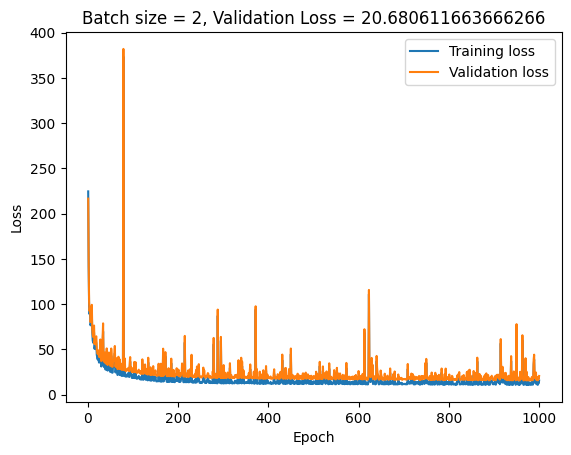

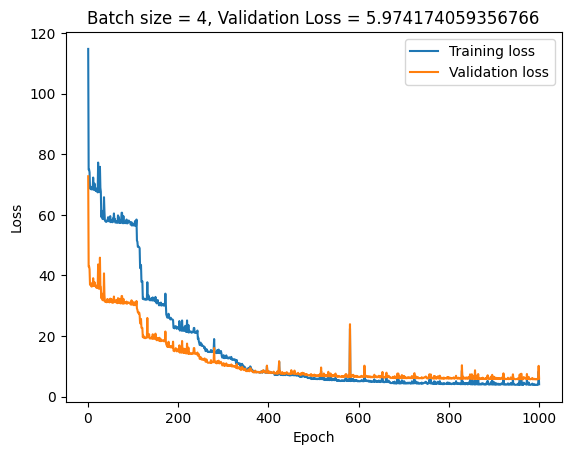

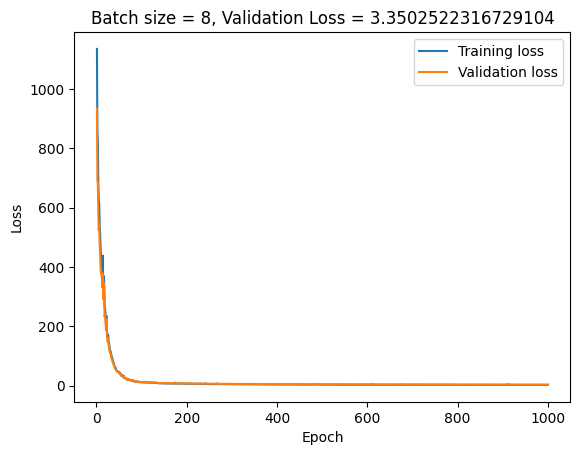

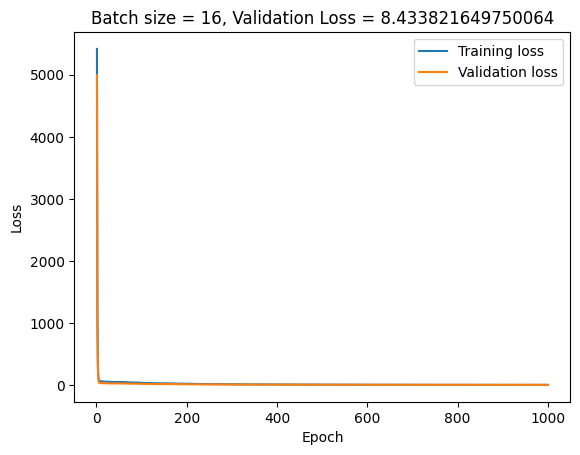

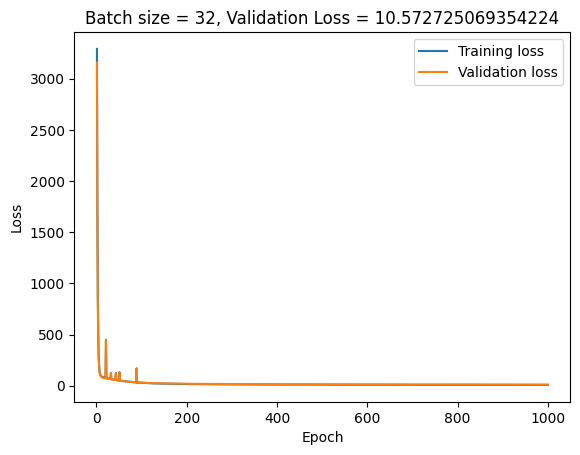

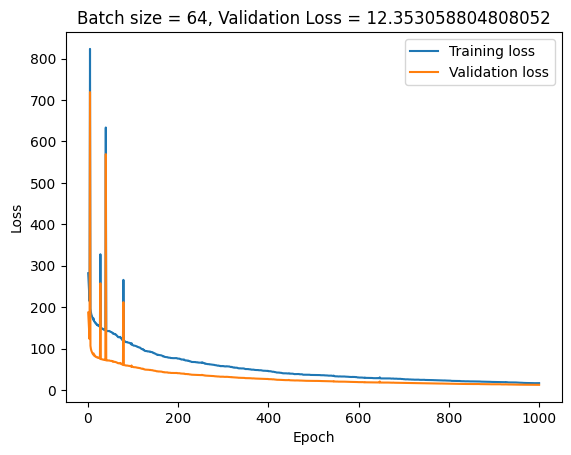

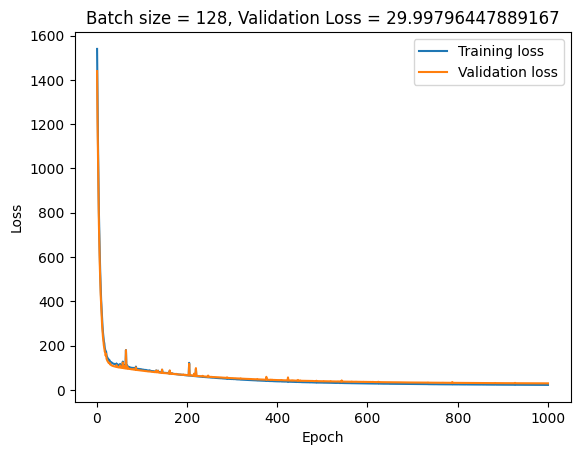

In [17]:
batch_sizes = [2**j for j in range(1, 8)]
learning_rate = 1e-7
num_epochs = 1000
epsilon = 1e-5

for batch_size in batch_sizes:
    _, losses_train, losses_val, losses_test = sgd(X_train, y_train, X_validation, y_validation, learning_rate, batch_size, num_epochs, epsilon)
    epochs = range(1, len(losses_train)+1)    
    plt.plot(epochs, losses_train, label='Training loss')
    plt.plot(epochs, losses_val, label='Validation loss')
    plt.title(f'Batch size = {batch_size}, Validation Loss = {losses_val[-1]}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Para qualquer tamanho de mini_batch, é possível ver que o formato das curvas de perda são bem semelhantes, diminuindo muito rapidamente e se estabilizando logo, ou pelo menos decrescendo mais lentamente. Isso se dá porque, enquanto está distante do mínimo, o SGD realiza passos maiores para se aproximar mais rapidamente, enquanto que dá passos menores conforme fica mais próximo para não extrapolar o mínimo. Para tamanhos pequenos de mini_batch também é possível ver que a perda tem alguns picos ao longo de toda a curva, enquanto que para tamanhos maiores de mini_batch, os picos são menos comuns, e mais concentrados até a época 200. Isso é devido a tamanhos maiores de batch ofereceram uma estimativa melhor para os gradientes.

#### OLS

In [8]:
def ols(X_train, y_train):
    theta = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)
    y_pred_test = X_test.dot(theta)
    mse_test = np.mean((y_pred_test - y_test)**2)
    
    y_pred_train = X_train.dot(theta)
    mse_train = np.mean((y_pred_train - y_train)**2)
    
    y_pred_validation = X_validation.dot(theta)
    mse_validation = np.mean((y_pred_validation - y_validation)**2)
    
    return theta, y_pred_test, y_pred_train, y_pred_validation, mse_test, mse_train, mse_validation

In [9]:
theta, y_pred_test, y_pred_train, y_pred_validation, mse_test, mse_train, mse_validation = ols(X_train, y_train)
print(f'Perda do MSE de treino: {mse_train:.4f} \nPerda do MSE de teste: {mse_test:.4f} \nPerda do MSE de validação: {mse_validation:.4f} \nTheta={theta}')

Perda do MSE de treino: 0.5943 
Perda do MSE de teste: 0.6120 
Perda do MSE de validação: 0.6294 
Theta=[ 5.34687678e-01  1.59458825e-02 -2.17286350e-01  1.03175592e+00
  7.40262460e-06 -4.10908281e-03 -5.41721322e-02 -1.27754508e-02]


**Exercício 2.** Agora, você deve implementar uma **Rede RBF** com função de base Gaussiana (veja as notas de aula).
Para os centróides, utilize o output de um modelo de clusterização por K médias, por meio da função que disponibilizamos, como a seguir:

In [10]:
def k_means_factory(n_clusters: int) -> KMeans:
    return KMeans(n_clusters=n_clusters, n_init=10)

k_means_model = k_means_factory(n_clusters=2)
dumb_data = np.array(
    [[1, 2],
     [1, 4],
     [1, 0],
     [10, 2],
     [10, 4],
     [10, 0]]
)
k_means_model.fit(dumb_data)
cluster_centers = k_means_model.cluster_centers_
print(cluster_centers) # Shape (n_clusters, n_features)

[[10.  2.]
 [ 1.  2.]]


C:\Users\ilana\.julia\conda\3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para determinar o melhor valor de $k$ para o algoritmo de clusterização, treine o modelo (usando a fórmula de OLS) com diferentes valores e escolha o que possuir o menor erro de validação. Faça um gráfico mostrando o valor do erro de validação para diferentes valores de $k$. Mostre também a performance do modelo escolhido no conjunto de teste. Compare com o modelo linear simples da questão anterior. Discuta os resultados.

Para definir o valor do hiper-parâmetro $\gamma$, use a seguinte heurística --- que pode ser achado no livro "Neural Networks", por Simon Haykin:

$$
\gamma = \frac{1}{d_\text{max}^2},
$$

onde $d_\text{max}$ é a maior distância entre um par de centróides. Note que o valor costuma mudar para $k$'s diferentes.


In [11]:
class RBFN():
    def __init__(self, clusters_range, random_state=42):
        self.clusters_range = clusters_range
        self.random_state = random_state
        self.centros = None
        self.W = None    
        self.errors = []
        self.best_n_clusters = None
    
    def regressor(self, X, centros):
        d_max = np.max([np.linalg.norm(centros[i] - centros[j]) for i in range(len(centros)) for j in range(len(centros))])
        distances = np.zeros((X.shape[0], len(centros))) 
        
        def gaussian_basis(x, c):
            return np.exp(-np.linalg.norm(x-c)**2 / d_max) 
        
        for i in range(X.shape[0]):
            for j in range(len(centros)):
                # Calcula a função gaussiana (f_ci(x) = e^-gamma||x-ci||^2)
                distances[i, j] = gaussian_basis(X[i], centros[j])
    
        return distances      
   
    def fit(self, X, y, X_val, y_val):
        best_mse = np.inf
        best_n_clusters = None

        for n_clusters in range(self.clusters_range[0], self.clusters_range[1]):
            k_means_model = k_means_factory(n_clusters=n_clusters)
            k_means_model.fit(X)
            distances = self.regressor(X, k_means_model.cluster_centers_)
            distances_val = self.regressor(X_val, k_means_model.cluster_centers_)
            centers_n = k_means_model.cluster_centers_
            W_n = np.dot(np.dot(np.linalg.inv(np.dot(distances.transpose(), distances) + 1e-6*np.eye(n_clusters)), distances.transpose()), y)
 #(X^T X)X^T y, deixa a matriz inversível

            mse = np.mean((y - np.dot(distances, W_n)) ** 2)
            mse_val = np.mean((y_val - np.dot(distances_val, W_n)) ** 2)
            self.errors.append(mse_val)
            if mse_val < best_mse:
                best_mse = mse_val
                best_n_clusters = n_clusters
                self.centros = centers_n
                self.W = W_n
                self.best_n_clusters = best_n_clusters

        print(f"Número ideal de clusters: {self.best_n_clusters}, Melhor MSE: {best_mse}")
        
    def predict(self, X):
        return np.dot(X, self.W) 

# Define os dados de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(features_train, labels_train, test_size=0.25, random_state=SEED)


Número ideal de clusters: 10, Melhor MSE: 1.9845689933419006
Número ideal de clusters: 10, Melhor MSE: 1.9917266460422118


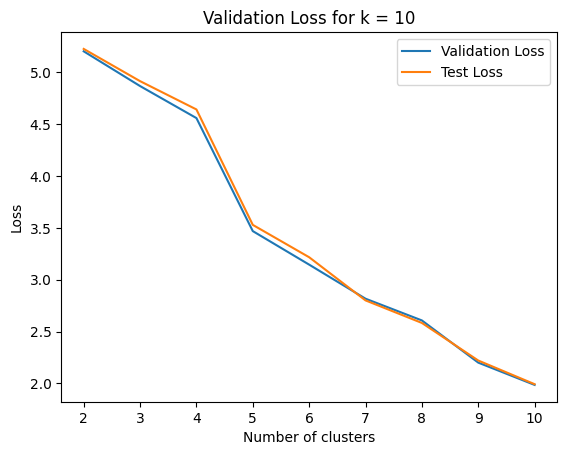

In [12]:
# Cria a rede RBF e ajusta os dados       
clusters_range = [2, 11]
rbfn_val = RBFN(clusters_range)
rbfn_val.fit(X_train, y_train, X_val, y_val)
rbfn_test = RBFN(clusters_range)
rbfn_test.fit(X_train, y_train, X_test, y_test)

# Plota o gráfico de erro de validação para diferentes valores de k
ks = range(clusters_range[0], clusters_range[1])
plt.plot(ks, rbfn_val.errors, label = 'Validation Loss')
plt.plot(ks, rbfn_test.errors, label = 'Test Loss')
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.title(f'Validation Loss for k = {ks[-1]}')
plt.legend()
plt.show()     

Número ideal de clusters: 15, Melhor MSE: 1.5323433605402044
Número ideal de clusters: 15, Melhor MSE: 1.5306104066297486


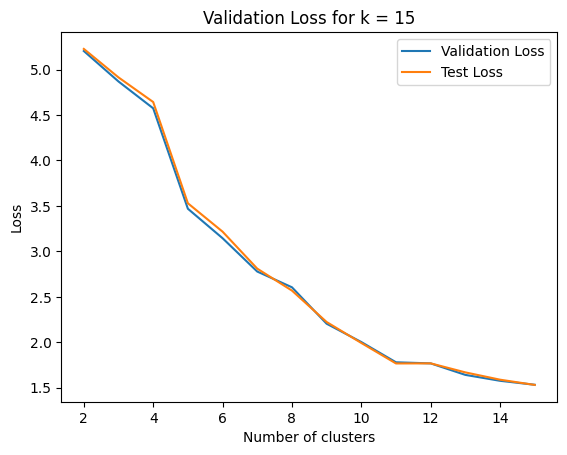

In [13]:
# Cria a rede RBF e ajusta os dados
clusters_range = [2, 16]
rbfn_val = RBFN(clusters_range)
rbfn_val.fit(X_train, y_train, X_val, y_val)
rbfn_test = RBFN(clusters_range)
rbfn_test.fit(X_train, y_train, X_test, y_test)

# Plota o gráfico de erro de validação para diferentes valores de k
ks = range(clusters_range[0], clusters_range[1])
plt.plot(ks, rbfn_val.errors, label = 'Validation Loss')
plt.plot(ks, rbfn_test.errors, label = 'Test Loss')
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.title(f'Validation Loss for k = {ks[-1]}')
plt.legend()
plt.show()     

Número ideal de clusters: 19, Melhor MSE: 1.4283148905021943
Número ideal de clusters: 20, Melhor MSE: 1.4476279118496413


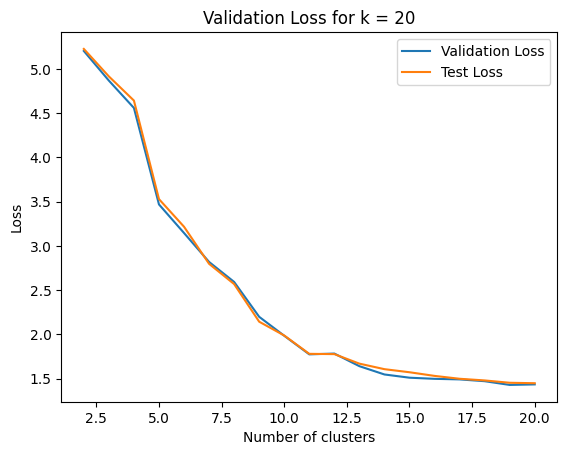

In [14]:
# Cria a rede RBF e ajusta os dados
clusters_range = [2, 21]
rbfn_val = RBFN(clusters_range)
rbfn_val.fit(X_train, y_train, X_val, y_val)
rbfn_test = RBFN(clusters_range)
rbfn_test.fit(X_train, y_train, X_test, y_test)

# Plota o gráfico de erro de validação para diferentes valores de k
ks = range(clusters_range[0], clusters_range[1])
plt.plot(ks, rbfn_val.errors, label = 'Validation Loss')
plt.plot(ks, rbfn_test.errors, label = 'Test Loss')
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.title(f'Validation Loss for k = {ks[-1]}')
plt.legend()
plt.show()     

Número ideal de clusters: 24, Melhor MSE: 1.3777902940059434
Número ideal de clusters: 24, Melhor MSE: 1.3828232107602305


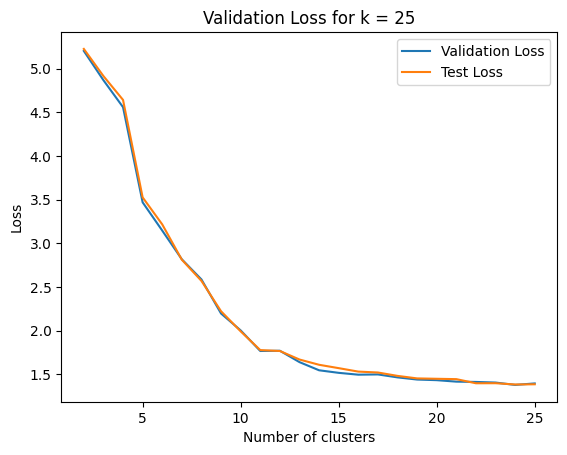

In [15]:
# Cria a rede RBF e ajusta os dados
clusters_range = [2, 26]
rbfn_val = RBFN(clusters_range)
rbfn_val.fit(X_train, y_train, X_val, y_val)
rbfn_test = RBFN(clusters_range)
rbfn_test.fit(X_train, y_train, X_test, y_test)

# Plota o gráfico de erro de validação para diferentes valores de k
ks = range(clusters_range[0], clusters_range[1])
plt.plot(ks, rbfn_val.errors, label = 'Validation Loss')
plt.plot(ks, rbfn_test.errors, label = 'Test Loss')
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.title(f'Validation Loss for k = {ks[-1]}')
plt.legend()
plt.show()     

Número ideal de clusters: 49, Melhor MSE: 1.3172013950877723
Número ideal de clusters: 46, Melhor MSE: 1.3273994693799316


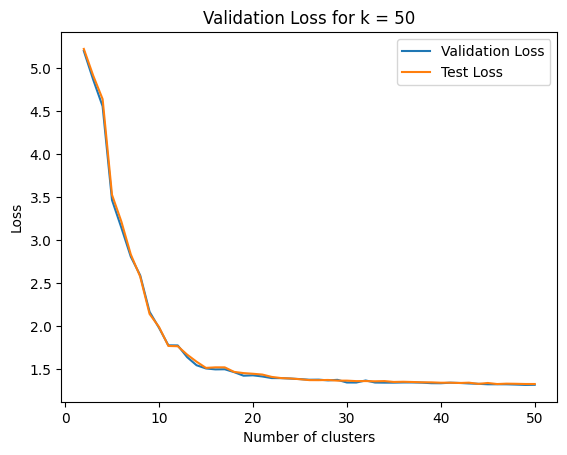

In [16]:
# Cria a rede RBF e ajusta os dados
clusters_range = [2, 51]
rbfn_val = RBFN(clusters_range)
rbfn_val.fit(X_train, y_train, X_val, y_val)
rbfn_test = RBFN(clusters_range)
rbfn_test.fit(X_train, y_train, X_test, y_test)

# Plota o gráfico de erro de validação para diferentes valores de k
ks = range(clusters_range[0], clusters_range[1])
plt.plot(ks, rbfn_val.errors, label = 'Validation Loss')
plt.plot(ks, rbfn_test.errors, label = 'Test Loss')
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.title(f'Validation Loss for k = {ks[-1]}')
plt.legend()
plt.show()     

Analisando os resultados do método RBF, é possível ver que os erros de validação ficam bem baixos, com resultados bem melhores do que o método SGD para qualquer um dos mini-batches testados na questão 1. Contudo, aumentar muito o número de clusters também aumenta consideravelmente o tempo de produção dos gráficos, o que tornou inviável de ir aumentando o range de clusters para ver se o erro de validação se aproximaria do erro obtido com o OLS. 

É possível ver também que o modelo também tem uma performance boa com o conjunto de teste, visto que o valor do MSE é sempre bem próximo entre os dados de validação e teste.

# Exercícios de "papel e caneta"

**Exercício 1.** Deixe que $X \in \mathbb{R}^{N\times D}$, $c>0$ e $I$ denote a matriz identidade de dimensão $D$.
 Mostre que $X^\intercal X + c I$ possui inversa.

Solução: Usando $u \in \mathbb{R}^D \setminus \{0\}$, temos: 

$$\langle (X^TX+cI)u, u \rangle = c\langle u, u \rangle + \langle X^TXu, u \rangle = \\
= c\langle u, u \rangle + \langle Xu, Xu \rangle \geq c\langle u, u \rangle > 0$$

Com isso, $(X^TX+cI)u \neq 0 \ \forall \ u \in \mathbb{R}^D \setminus \{0\}$, e portanto é invertível.

(https://math.stackexchange.com/questions/1647625/when-is-mathbfxt-mathbfx-lambda-mathbfi-invertible)

**Exercício 2.** Deixe que $X \in \mathbb{R}^{N\times D}$ seja uma matriz contendo os exemplos de treinamento (um por linha) e que $y\in \mathbb{R}^N$ seja um vetor coluna os outputs observados para cada vetor de input em suas linhas. Na aula, derivamos a solução de mínimos quadrados ordinários (OLS). Use o mesmo raciocínio para resolver achar o vetor de pesos ${\theta}$ que minimiza:
 
$$ \|X \theta - y\|_2^2 + c \|\theta\|_2^2 $$

onde $c>0$ é uma constante.

Solução: Para minimizar a função acima, podemos derivar e igualar a 0:

$$\nabla f(\theta) = 2X^TX\theta -2X^Ty +2c\theta \Rightarrow \\
2X^TX\theta -2X^Ty +2c\theta = 0 \Rightarrow X^TX\theta + c\theta = x^Ty \Rightarrow \\
\theta = (X^TX+cI)^{-1}X^Ty$$

Assim, concluímos que o vetor $\theta$ que minimiza $ \|X \theta - y\|_2^2 + c \|\theta\|_2^2 $ é $\theta = (X^TX+cI)^{-1}X^Ty$.

**Exercício 3.** Em algumas situações, temos muito mais features que amostras ($D \gg N$). Esse tipo de cenário é comum, e.g., na análise de dados genômicos. Nesse caso, costumam existir infinitas combinações lineares das features que expressam o vetor de saídas $y$. Portanto, precisamos de algum critério para escolher um deles. Uma abordagem possível, é escolher o vetor de pesos $\theta$ que possua menor norma L2.
Com isso em mente, derive a solução que minimiza $\|\theta\|_2^2$ e respeita $X \theta = y$. Assuma que as linhas de $X$ são linearmente independentes

Para encontramos $\theta$ que minimiza $\|\theta\|_2^2$ e respeita $X \theta = y$, podemos usar o método do multiplicador de Lagrange $L(x, \lambda) = f(x) +\lambda g(x)$ para minimizar $f(x)$ sujeito à restrição $g(x) = 0$. Nesse caso, $f(x) = \|\theta\|_2^2$ e $g(x) = X\theta-y$. Assim, para minimizar a função, podemos derivar e igualar a 0:

$$L(\theta, \lambda) = \|\theta\|_2^2 +\lambda(X\theta-y) \\
L_{\theta} = 2\theta + X^T\lambda  = 0 \\
L_{\lambda} = X\theta-y = 0$$

Tendo isso, respeitando $X\theta = y$, chegamos a $\theta = -\dfrac{1}{2}X^T\lambda$. Substituindo na segunda equação:

$$X(-\dfrac{1}{2}X^T\lambda) - y = 0 \Rightarrow X(-\dfrac{1}{2}X^T\lambda) = y \Rightarrow X(X^T \lambda) = -2y\\
 $$

Usando isso, podemos achar $\lambda$ e $\theta$:

$$X(X^T \lambda) = -2y \Rightarrow \lambda = -2(XX^T)^{-1}y \\
\theta = -\dfrac{1}{2}X^T\lambda = -\dfrac{1}{2}X^T(-2(XX^T)^{-1}y) = X^T(XX^T)^{-1}y = (X^TX)^{-1}X^Ty$$